In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
data=pd.read_csv('/home/arooshi/Desktop/air pollution forecarting/PRSA_data_2010.1.1-2014.12.31.csv')

In [113]:
data.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [114]:
print (data.values.shape)

(43824, 13)


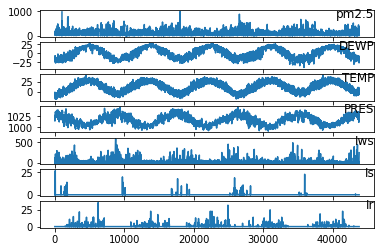

In [115]:
val=data.values
#specify columns to plot
groups = [ 5, 6, 7,8,10,11,12]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(val[:, group])
	plt.title(data.columns[group], y=0.5, loc='right')
	i += 1
plt.savefig('cyclical patterns.png')
#7 subplots showing the 5 years of data for each variable.


In [116]:
d1=data.fillna(0)  # droped those rows whose values are nan
print(d1.values.shape)

(43824, 13)


In [117]:
d1.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [118]:
d1.reset_index(inplace=True) # reseting index from 0

In [119]:
d1.head(5)

,index,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,0,1,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,1,2,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2,3,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,3,4,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,4,5,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [120]:
d1=d1.drop(columns=['index','No'])
d1.head(5)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [121]:
d2=pd.to_datetime(d1[['year','month','day','hour']])

In [122]:
print(d2.head(5))

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
dtype: datetime64[ns]


In [123]:
d1=d1.drop(columns=['year','month','day','hour'])
d1.head(5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [124]:
final_data=pd.concat([d2,d1],axis=1)

In [125]:
final_data.head(5)

,0,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [126]:
print(final_data.values.shape)

(43824, 9)


In [127]:
df = pd.DataFrame(final_data)
df.columns = ['date','pollution','dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [128]:
df.head(15)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
5,2010-01-01 05:00:00,0.0,-19,-10.0,1017.0,NW,16.10,0,0
6,2010-01-01 06:00:00,0.0,-19,-9.0,1017.0,NW,19.23,0,0
7,2010-01-01 07:00:00,0.0,-19,-9.0,1017.0,NW,21.02,0,0
8,2010-01-01 08:00:00,0.0,-19,-9.0,1017.0,NW,24.15,0,0
9,2010-01-01 09:00:00,0.0,-20,-8.0,1017.0,NW,27.28,0,0


In [129]:
# data with no NAN values and well prepared

In [130]:
# preparing data for lstm
values=df.values[:,2:]

In [131]:
print(values)

[[-21 -11.0 1021.0 ..., 1.79 0 0]
 [-21 -12.0 1020.0 ..., 4.92 0 0]
 [-21 -11.0 1019.0 ..., 6.71 0 0]
 ..., 
 [-22 -3.0 1034.0 ..., 242.7 0 0]
 [-22 -4.0 1034.0 ..., 246.72 0 0]
 [-21 -3.0 1034.0 ..., 249.85 0 0]]


In [132]:
label=df.values[1:,1]
print(label)

[0.0 0.0 0.0 ..., 10.0 8.0 12.0]


In [133]:
s_1=pd.DataFrame(values)
s_2=pd.DataFrame(label)
s=pd.concat([s_1,s_2],axis=1)

In [134]:
print(s)

         0   1     2   3       4  5  6    0
0      -21 -11  1021  NW    1.79  0  0    0
1      -21 -12  1020  NW    4.92  0  0    0
2      -21 -11  1019  NW    6.71  0  0    0
3      -21 -14  1019  NW    9.84  0  0    0
4      -20 -12  1018  NW   12.97  0  0    0
5      -19 -10  1017  NW    16.1  0  0    0
6      -19  -9  1017  NW   19.23  0  0    0
7      -19  -9  1017  NW   21.02  0  0    0
8      -19  -9  1017  NW   24.15  0  0    0
9      -20  -8  1017  NW   27.28  0  0    0
10     -19  -7  1017  NW    31.3  0  0    0
11     -18  -5  1017  NW   34.43  0  0    0
12     -19  -5  1015  NW   37.56  0  0    0
13     -18  -3  1015  NW   40.69  0  0    0
14     -18  -2  1014  NW   43.82  0  0    0
15     -18  -1  1014  cv    0.89  0  0    0
16     -19  -2  1015  NW    1.79  0  0    0
17     -18  -3  1015  NW    2.68  0  0    0
18     -18  -5  1016  NE    1.79  0  0    0
19     -17  -4  1017  NW    1.79  0  0    0
20     -17  -5  1017  cv    0.89  0  0    0
21     -17  -5  1018  NW    1.79

In [135]:
s.columns=['var1(t-1)','var2(t-1)','var3(t-1)','var4(t-1)','var_5(t-1)','var_6(t-1)','var_7(t-1)','var(t)']
print(s)

      var1(t-1) var2(t-1) var3(t-1) var4(t-1) var_5(t-1) var_6(t-1)  \
0           -21       -11      1021        NW       1.79          0   
1           -21       -12      1020        NW       4.92          0   
2           -21       -11      1019        NW       6.71          0   
3           -21       -14      1019        NW       9.84          0   
4           -20       -12      1018        NW      12.97          0   
5           -19       -10      1017        NW       16.1          0   
6           -19        -9      1017        NW      19.23          0   
7           -19        -9      1017        NW      21.02          0   
8           -19        -9      1017        NW      24.15          0   
9           -20        -8      1017        NW      27.28          0   
10          -19        -7      1017        NW       31.3          0   
11          -18        -5      1017        NW      34.43          0   
12          -19        -5      1015        NW      37.56          0   
13    

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM

In [137]:
encoder=LabelEncoder() # label encoding wind direction
s.values[:,3]=encoder.fit_transform(s.values[:,3])
print(s)


      var1(t-1) var2(t-1) var3(t-1) var4(t-1) var_5(t-1) var_6(t-1)  \
0           -21       -11      1021         1       1.79          0   
1           -21       -12      1020         1       4.92          0   
2           -21       -11      1019         1       6.71          0   
3           -21       -14      1019         1       9.84          0   
4           -20       -12      1018         1      12.97          0   
5           -19       -10      1017         1       16.1          0   
6           -19        -9      1017         1      19.23          0   
7           -19        -9      1017         1      21.02          0   
8           -19        -9      1017         1      24.15          0   
9           -20        -8      1017         1      27.28          0   
10          -19        -7      1017         1       31.3          0   
11          -18        -5      1017         1      34.43          0   
12          -19        -5      1015         1      37.56          0   
13    

In [138]:
s=s.dropna(axis=0)
scaler = MinMaxScaler(feature_range=(0, 1)) #normalisation for lstm
scaled = scaler.fit_transform(s.values)
print(scaled)

[[ 0.27941176  0.13114754  0.54545455 ...,  0.          0.          0.        ]
 [ 0.27941176  0.1147541   0.52727273 ...,  0.          0.          0.        ]
 [ 0.27941176  0.13114754  0.50909091 ...,  0.          0.          0.        ]
 ..., 
 [ 0.26470588  0.26229508  0.78181818 ...,  0.          0.          0.01006036]
 [ 0.26470588  0.26229508  0.78181818 ...,  0.          0.          0.00804829]
 [ 0.26470588  0.24590164  0.78181818 ...,  0.          0.          0.01207243]]


/home/arooshi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [139]:
#splitting into training and testing
n=int(365*3*24)
print(n)

26280


In [140]:
# splitting into training and testing
train_data=scaled[:n,:]
test_data=scaled[n:,:]
print(train_data.shape)
print(test_data.shape)

(26280, 8)
(17543, 8)


In [141]:
#splitting label
train_X, train_y = train_data[:, :-1], train_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

In [142]:
# reshaping data ....converting 2D data into 3D
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(26280, 1, 7) (26280,) (17543, 1, 7) (17543,)


In [143]:
model=Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add (Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
keras.callbacks.History()
history=model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), shuffle=False)


Train on 26280 samples, validate on 17543 samples
Epoch 1/50
26280/26280 [==============================] - 2s 60us/step - loss: 0.0623 - val_loss: 0.0740
Epoch 2/50
26280/26280 [==============================] - 1s 37us/step - loss: 0.0569 - val_loss: 0.0835
Epoch 3/50
26280/26280 [==============================] - 1s 36us/step - loss: 0.0562 - val_loss: 0.0858
Epoch 4/50
26280/26280 [==============================] - 1s 35us/step - loss: 0.0559 - val_loss: 0.0818
Epoch 5/50
26280/26280 [==============================] - 1s 36us/step - loss: 0.0559 - val_loss: 0.0772
Epoch 6/50
26280/26280 [==============================] - 1s 35us/step - loss: 0.0558 - val_loss: 0.0710
Epoch 7/50
26280/26280 [==============================] - 1s 35us/step - loss: 0.0556 - val_loss: 0.0682
Epoch 8/50
26280/26280 [==============================] - 1s 35us/step - loss: 0.0554 - val_loss: 0.0664
Epoch 9/50
26280/26280 [==============================] - 1s 36us/step - loss: 0.0553 - val_loss: 0.0648
Epoch

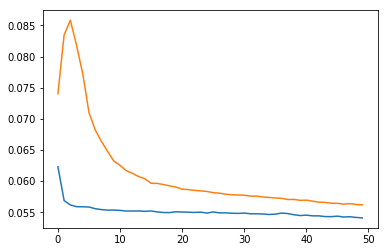

In [144]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.show()

In [145]:
yhat = model.predict(test_X)

In [146]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [147]:
inv_yhat =np.concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [148]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [149]:
import math
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 6.062
